Step 1: Import Required Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import math

Step 2: Load Dataset

In [17]:
#Dataset Overview + size of Dataset
df = pd.read_csv("StudentPerformanceFactors.csv")
print("Dataset Shape: ", df.shape)
df.head()

Dataset Shape:  (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Step 3: Data Cleaning & Basic visualization

In [18]:
print(df.isnull().sum())      # Check Missing Values

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


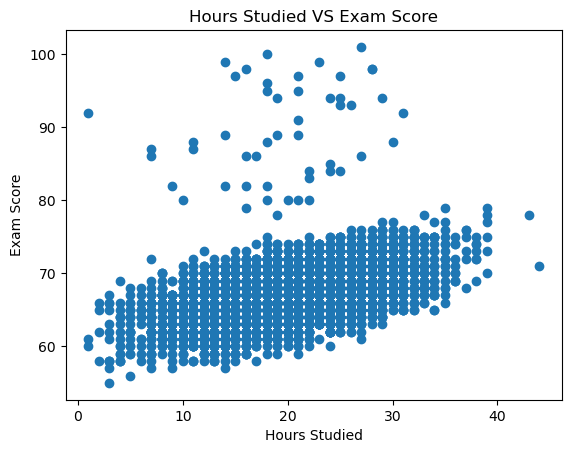

In [19]:
df = df.dropna()    # Drop Missing Values

plt.scatter(df["Hours_Studied"], df["Exam_Score"])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied VS Exam Score")
plt.show()

Step 4: Train-Test Split

In [20]:
X = df[["Hours_Studied"]]    # Independent Variable
y = df["Exam_Score"]       # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Step 5: Train Linear Regression Model

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

Step 6: Evaluate Linear Regression

In [23]:
print("\nLinear Regression Results ")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))



Linear Regression Results 
Mean Absolute Error: 2.529242069526124
Mean Squared Error: 12.351733799445533
Root Mean Squared Error: 3.5145033503249836
R² Score: 0.20513060832466712


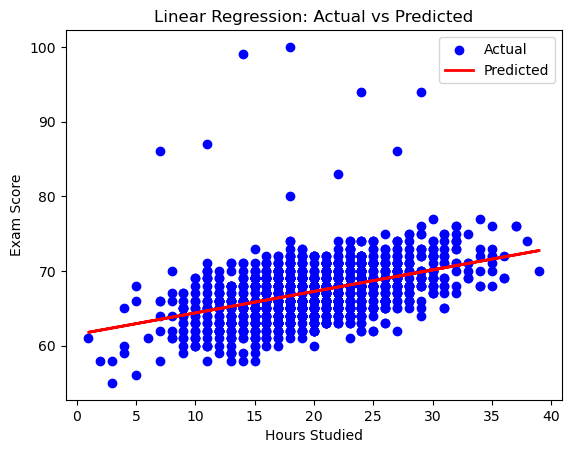

In [26]:
# Visualization

plt.scatter(X_test, y_test, color = 'blue', label = 'Actual')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2, label = 'Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

BONUS 1: Polynomial Regression

In [28]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_poly_pred = poly_model.predict(X_test_poly)

In [31]:
print("\nPolynomial Regression Results")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_poly_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_poly_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_poly_pred)))
print("R² Score:", r2_score(y_test, y_poly_pred))


Polynomial Regression Results
Mean Absolute Error: 2.5285609417656434
Mean Squared Error: 12.352544212816404
Root Mean Squared Error: 3.5146186440091056
R² Score: 0.2050784559067499


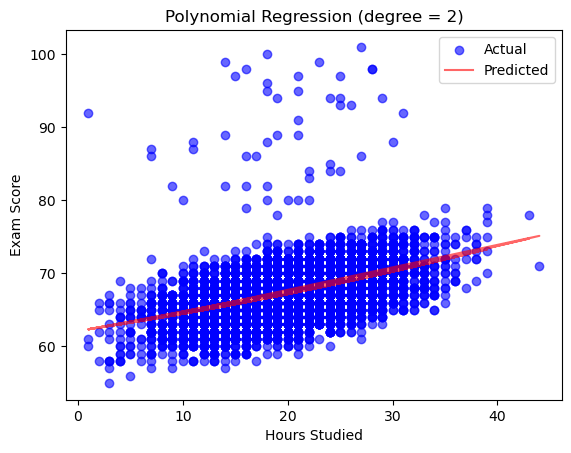

In [32]:
# Visualization

plt.scatter(X['Hours_Studied'], y, color = 'blue',  alpha = 0.6, label = 'Actual')
plt.plot(X['Hours_Studied'], poly_model.predict(X_poly), color = 'red', alpha = 0.6, label = 'Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Polynomial Regression (degree = 2)')
plt.legend()
plt.show()

BONUS 2: Try Multiple Features

In [35]:
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours']       # Multi-features
X_multi = df[features]
y_multi = df['Exam_Score']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

y_multi_pred = multi_model.predict(X_test_m)

print("\nMultiple Features Regression Results")
print("Mean Absolute Error:", mean_absolute_error(y_test_m, y_multi_pred))
print("Mean Squared Error:", mean_squared_error(y_test_m, y_multi_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test_m, y_multi_pred)))
print("R² Score:", r2_score(y_test_m, y_multi_pred))


Multiple Features Regression Results
Mean Absolute Error: 1.532699533938977
Mean Squared Error: 7.0186406828675345
Root Mean Squared Error: 2.649271726884114
R² Score: 0.5483304011758174
